In [1]:
import tomotopy as tp
import pandas as pd
import numpy as np
import pickle
from sklearn.datasets import fetch_20newsgroups
import nltk
import sys
import os

import random

from matplotlib import pyplot as plt

%matplotlib inline

# Load pickle data

In [2]:
pickle_data_path = "/Users/brendan/Desktop/PostDoc/work/STDeconvolve/data/Generate_simulations_ct3_mx50_s1000.pickle"

with open(pickle_data_path, 'rb') as f:
    pickle_data = pickle.load(f)

train_data_sub = pickle_data[0]
train_data_ground_truth = pickle_data[1]
train_data_gt_gene_freq = pickle_data[2]
train_data_ct_gene_freq = pickle_data[3]

simulated_spots = pickle_data[4] # `ct3_mx50_sigGenes_depthNorm`
ground_truth = pickle_data[5] # `spot_proportions_ct3_mx50_s1000`

'''
mm <- model.matrix(~ 0 + com) # com is the factor with single cell IDs and the clusters they belong to
colnames(mm) <- levels(com)
ct.gexp <- t(geneCountsClean %*% mm)

# now select the cell types sampled and the significant genes:
ground_truth_topic_words <- ct.gexp[1:3, sigClusterGenes_ct3]
rownames(ground_truth_topic_words) <- paste0('gt', seq_len(3))

ground_truth_topic_words_freq <- ground_truth_topic_words / rowSums(ground_truth_topic_words)
ground_truth_topic_words_freq
'''

ground_truth_topic_words = pickle_data[6]
ground_truth_topic_words_freq = pickle_data[7]

## Simple Simulation Files

In [3]:
train_data_sub

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
sim1,1088.0,990.0,1088.0,1088.0,1160.0,964.0,1852.0,1950.0,1950.0,2146.0
sim2,995.0,910.0,995.0,995.0,900.0,730.0,1555.0,1640.0,1640.0,1810.0
sim3,1067.0,980.0,1067.0,1067.0,940.0,766.0,1543.0,1630.0,1630.0,1804.0
sim4,1161.0,1070.0,1161.0,1161.0,1020.0,838.0,1569.0,1660.0,1660.0,1842.0
sim5,1288.0,1190.0,1288.0,1288.0,1160.0,964.0,1652.0,1750.0,1750.0,1946.0
sim6,1184.0,1100.0,1184.0,1184.0,880.0,712.0,1336.0,1420.0,1420.0,1588.0
sim7,1388.0,1290.0,1388.0,1388.0,1160.0,964.0,1552.0,1650.0,1650.0,1846.0
sim8,1449.0,1350.0,1449.0,1449.0,1180.0,982.0,1521.0,1620.0,1620.0,1818.0
sim9,1433.0,1340.0,1433.0,1433.0,1060.0,874.0,1357.0,1450.0,1450.0,1636.0
sim10,1483.0,1390.0,1483.0,1483.0,1060.0,874.0,1307.0,1400.0,1400.0,1586.0


In [4]:
train_data_ground_truth

,ctA,ctB,ctC
sim1,0.010204,0.806122,0.183673
sim2,0.070588,0.870588,0.058824
sim3,0.126437,0.793103,0.080460
sim4,0.175824,0.703297,0.120879
sim5,0.214286,0.602041,0.183673
sim6,0.309524,0.642857,0.047619
sim7,0.316327,0.500000,0.183673
sim8,0.363636,0.444444,0.191919
sim9,0.440860,0.419355,0.139785
sim10,0.494624,0.365591,0.139785


In [5]:
train_data_gt_gene_freq

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
x1,0.147887,0.140845,0.147887,0.147887,0.070423,0.056338,0.063380,0.070423,0.070423,0.084507
x2,0.077465,0.070423,0.077465,0.077465,0.070423,0.056338,0.133803,0.140845,0.140845,0.154930
x3,0.067901,0.061728,0.067901,0.067901,0.123457,0.111111,0.117284,0.123457,0.123457,0.135802


In [6]:
train_data_ct_gene_freq

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
ctA,0.116709,0.109774,0.116709,0.116709,0.076971,0.063101,0.091338,0.098273,0.098273,0.112143
ctB,0.095923,0.088997,0.095923,0.095923,0.077515,0.063664,0.111856,0.118782,0.118782,0.132634
ctC,0.103061,0.096161,0.103061,0.103061,0.079091,0.065291,0.103943,0.110843,0.110843,0.124644


## Complex Simulation Files

In [7]:
simulated_spots

,MAL,IL7R,LTB,PRKCQ-AS1,CD3D,CCR7,JUNB,NOSIP,CD52,JUN,...,NKG7,MAPK1,TPST2,IL2RB,LGALS1,APOBEC3G,TSPO,TTC38,MT-ND1,MT-ND4
0,16.0,53.0,323.0,24.0,133.0,61.0,149.0,93.0,311.0,81.0,...,0.0,4.0,12.0,0.0,8.0,8.0,28.0,0.0,202.0,254.0
1,13.0,33.0,150.0,8.0,75.0,8.0,58.0,29.0,84.0,58.0,...,434.0,0.0,4.0,29.0,13.0,17.0,29.0,4.0,230.0,138.0
2,7.0,10.0,79.0,10.0,31.0,12.0,44.0,34.0,87.0,56.0,...,404.0,3.0,16.0,38.0,49.0,10.0,24.0,14.0,195.0,161.0
3,0.0,10.0,39.0,5.0,12.0,10.0,39.0,34.0,72.0,46.0,...,490.0,7.0,10.0,24.0,60.0,17.0,27.0,29.0,159.0,167.0
4,24.0,24.0,185.0,14.0,70.0,15.0,76.0,63.0,167.0,42.0,...,340.0,2.0,9.0,23.0,10.0,10.0,28.0,12.0,209.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41.0,20.0,292.0,20.0,190.0,68.0,163.0,163.0,346.0,41.0,...,0.0,7.0,0.0,0.0,0.0,0.0,27.0,0.0,285.0,156.0
996,28.0,39.0,282.0,28.0,90.0,30.0,87.0,86.0,236.0,50.0,...,126.0,0.0,6.0,8.0,8.0,6.0,27.0,1.0,215.0,229.0
997,53.0,55.0,388.0,47.0,157.0,47.0,170.0,135.0,325.0,79.0,...,8.0,3.0,3.0,5.0,17.0,3.0,28.0,2.0,262.0,203.0
998,28.0,62.0,337.0,24.0,136.0,36.0,119.0,121.0,297.0,68.0,...,3.0,1.0,3.0,0.0,10.0,3.0,19.0,0.0,227.0,240.0


In [8]:
ground_truth

,ct1,ct2,ct3
0,0.562500,0.437500,0.000000
1,0.416667,0.000000,0.583333
2,0.027027,0.297297,0.675676
3,0.000000,0.166667,0.833333
4,0.595238,0.000000,0.404762
...,...,...,...
995,1.000000,0.000000,0.000000
996,0.155556,0.644444,0.200000
997,1.000000,0.000000,0.000000
998,0.250000,0.750000,0.000000


In [9]:
ground_truth_topic_words

,MAL,IL7R,LTB,PRKCQ-AS1,CD3D,CCR7,JUNB,NOSIP,CD52,JUN,...,NKG7,MAPK1,TPST2,IL2RB,LGALS1,APOBEC3G,TSPO,TTC38,MT-ND1,MT-ND4
gt1,193.0,232.0,1651.0,181.0,674.0,241.0,669.0,607.0,1389.0,334.0,...,15.0,13.0,16.0,7.0,45.0,6.0,131.0,1.0,1181.0,882.0
gt2,230.0,321.0,2357.0,234.0,970.0,293.0,893.0,793.0,1932.0,614.0,...,19.0,13.0,28.0,8.0,56.0,28.0,169.0,3.0,1709.0,1950.0
gt3,4.0,22.0,134.0,23.0,25.0,7.0,181.0,88.0,312.0,236.0,...,4308.0,64.0,112.0,248.0,242.0,114.0,157.0,97.0,1119.0,1199.0


In [10]:
ground_truth_topic_words_freq

,MAL,IL7R,LTB,PRKCQ-AS1,CD3D,CCR7,JUNB,NOSIP,CD52,JUN,...,NKG7,MAPK1,TPST2,IL2RB,LGALS1,APOBEC3G,TSPO,TTC38,MT-ND1,MT-ND4
gt1,0.004400,0.005290,0.037642,0.004127,0.015367,0.005495,0.015253,0.013839,0.031669,0.007615,...,0.000342,0.000296,0.000365,0.000160,0.001026,0.000137,0.002987,0.000023,0.026927,0.020109
gt2,0.003030,0.004229,0.031052,0.003083,0.012779,0.003860,0.011765,0.010447,0.025453,0.008089,...,0.000250,0.000171,0.000369,0.000105,0.000738,0.000369,0.002226,0.000040,0.022515,0.025690
gt3,0.000058,0.000318,0.001934,0.000332,0.000361,0.000101,0.002613,0.001270,0.004504,0.003407,...,0.062189,0.000924,0.001617,0.003580,0.003493,0.001646,0.002266,0.001400,0.016153,0.017308


# Simple Simulation

## Build corpus

Get lists of words (genes) for each document (spot), where gene words occur at a frequency equal to the count of the given gene in the spot.

In [40]:
# need to transpose `train_data_sub` so columns are spots:
sim_spot_df = train_data_sub.transpose()

corpus = []
for doc in sim_spot_df.columns:
    document = []
    for word, freq in zip(sim_spot_df.index.tolist(),
                          [int(count) for count in sim_spot_df[doc].values]):
        words = [word] * freq
        document = document + words
        
    # random sample 1000 genes from the document
#     if len(document) > 1000:
#         document = random.sample(document, 1000)
        
    corpus.append(document)

simple_corpus = corpus

## tomotopy HDP

In [44]:
%%time

# generate the model
simple_tp_hdp = tp.HDPModel(tw=tp.TermWeight.IDF, min_cf=0, rm_top=0,
                 gamma=1, alpha=1, initial_k=1, seed=1)

# notes:
# min_cf = Words with a smaller collection frequency than min_cf are excluded from the model.
# rm_top = If you want to remove too common words from model, you can set this value to 1 or more
# gamma = concentration coeficient of Dirichlet Process for table-topic
# alpha = concentration coeficient of Dirichlet Process for document-table
# initial_k = the initial number of topics

# Add docs from corpus to train
for doc in simple_corpus:
    simple_tp_hdp.add_doc(doc)

# Initiate MCMC burn-in 
simple_tp_hdp.burn_in = 100
simple_tp_hdp.train(0)
print('Num docs:', len(simple_tp_hdp.docs), ', Vocab size:', simple_tp_hdp.num_vocabs, ', Num words:', simple_tp_hdp.num_words)
print('Removed top words:', simple_tp_hdp.removed_top_words)
print('Training...', file=sys.stderr, flush=True)

Training...


Num docs: 16 , Vocab size: 10 , Num words: 209624
Removed top words: []
CPU times: user 85.6 ms, sys: 4.02 ms, total: 89.7 ms
Wall time: 91.6 ms


In [45]:
%%time
import time
import datetime

# Train model
mcmc_iter=100
train_cycle = 10
for i in range(0, mcmc_iter, train_cycle):
    
    start = time.time()
    
    simple_tp_hdp.train(train_cycle, workers=6)
    print('Iteration: {}\tLog-likelihood: {}\tNum. of topics: {}'.format(i,
                                                                         simple_tp_hdp.ll_per_word,
                                                                         simple_tp_hdp.live_k))
    
    stop = time.time()
    
    print("{} train cycle iterations done in {}".format(train_cycle, datetime.timedelta(seconds=stop-start)))

Iteration: 0	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.067855
Iteration: 10	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.075007
Iteration: 20	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.067183
Iteration: 30	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.066718
Iteration: 40	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.066187
Iteration: 50	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.054032
Iteration: 60	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.069215
Iteration: 70	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 train cycle iterations done in 0:00:00.065852
Iteration: 80	Log-likelihood: 11.253045929855361	Num. of topics: 1
10 tra

# Complex Simulation

## 3 ct, mx50, 1000 spots

### Build Corpus

Get lists of words (genes) for each document (spot), where gene words occur at a frequency equal to the count of the given gene in the spot.

In [46]:
# need to transpose `train_data_sub` so columns are spots:
sim_spot_df = simulated_spots.transpose()

corpus = []
for doc in sim_spot_df.columns:
    document = []
    for word, freq in zip(sim_spot_df.index.tolist(),
                          [int(count) for count in sim_spot_df[doc].values]):
        words = [word] * freq
        document = document + words
        
    # random sample 1000 genes from the document
#     if len(document) > 1000:
#         document = random.sample(document, 1000)
        
    corpus.append(document)

ct3_mx50_sigGenes_depthNorm_corpus = corpus

### tomotopy HDP

In [48]:
%%time

# generate the model
ct3_mx50_sigGenes_depthNorm_tp_hdp = tp.HDPModel(tw=tp.TermWeight.IDF, min_cf=0, rm_top=0,
                 gamma=1, alpha=1, initial_k=1, seed=1)

# notes:
# min_cf = Words with a smaller collection frequency than min_cf are excluded from the model.
# rm_top = If you want to remove too common words from model, you can set this value to 1 or more
# gamma = concentration coeficient of Dirichlet Process for table-topic
# alpha = concentration coeficient of Dirichlet Process for document-table
# initial_k = the initial number of topics

# Add docs from corpus to train
for doc in ct3_mx50_sigGenes_depthNorm_corpus:
    ct3_mx50_sigGenes_depthNorm_tp_hdp.add_doc(doc)

# Initiate MCMC burn-in 
ct3_mx50_sigGenes_depthNorm_tp_hdp.burn_in = 100
ct3_mx50_sigGenes_depthNorm_tp_hdp.train(0)

print('Num docs:', len(ct3_mx50_sigGenes_depthNorm_tp_hdp.docs),
      ', Vocab size:', ct3_mx50_sigGenes_depthNorm_tp_hdp.num_vocabs,
      ', Num words:', ct3_mx50_sigGenes_depthNorm_tp_hdp.num_words)

print('Removed top words:',
      ct3_mx50_sigGenes_depthNorm_tp_hdp.removed_top_words)

print('Training...', file=sys.stderr, flush=True)

Training...


Num docs: 1000 , Vocab size: 175 , Num words: 9999678
Removed top words: []
CPU times: user 13 s, sys: 224 ms, total: 13.2 s
Wall time: 13.3 s


In [49]:
%%time
import time
import datetime

# Train model
mcmc_iter=100
train_cycle = 10
for i in range(0, mcmc_iter, train_cycle):
    
    start = time.time()
    
    ct3_mx50_sigGenes_depthNorm_tp_hdp.train(train_cycle, workers=6)
    print('Iteration: {}\tLog-likelihood: {}\tNum. of topics: {}'.format(i,
                                                                         ct3_mx50_sigGenes_depthNorm_tp_hdp.ll_per_word,
                                                                         ct3_mx50_sigGenes_depthNorm_tp_hdp.live_k))
    
    stop = time.time()
    
    print("{} train cycle iterations done in {}".format(train_cycle, datetime.timedelta(seconds=stop-start)))

Iteration: 0	Log-likelihood: nan	Num. of topics: 2151
10 train cycle iterations done in 0:02:28.147754
Iteration: 10	Log-likelihood: nan	Num. of topics: 1971
10 train cycle iterations done in 0:02:04.744689
Iteration: 20	Log-likelihood: nan	Num. of topics: 1895
10 train cycle iterations done in 0:01:58.890035
Iteration: 30	Log-likelihood: nan	Num. of topics: 1854
10 train cycle iterations done in 0:01:57.152960
Iteration: 40	Log-likelihood: nan	Num. of topics: 1822
10 train cycle iterations done in 0:01:57.406037
Iteration: 50	Log-likelihood: nan	Num. of topics: 1791
10 train cycle iterations done in 0:01:56.620109
Iteration: 60	Log-likelihood: nan	Num. of topics: 1769
10 train cycle iterations done in 0:01:52.077970
Iteration: 70	Log-likelihood: nan	Num. of topics: 1746
10 train cycle iterations done in 0:01:40.152308
Iteration: 80	Log-likelihood: nan	Num. of topics: 1730
10 train cycle iterations done in 0:01:37.604135
Iteration: 90	Log-likelihood: nan	Num. of topics: 1716
10 train c

In [60]:
doc_inst = ct3_mx50_sigGenes_depthNorm_tp_hdp.make_doc(ct3_mx50_sigGenes_depthNorm_corpus[0])
topic_dist, ll = ct3_mx50_sigGenes_depthNorm_tp_hdp.infer(doc_inst)

In [61]:
a = topic_dist
top_topics = sorted(range(len(a)), key=lambda i: a[i])[-10:]
top_topics

[1237, 1240, 1241, 1243, 1200, 568, 557, 661, 1477, 1286]

In [62]:
topic_dist[top_topics]

array([8.19486377e-05, 8.19486377e-05, 8.19486377e-05, 8.19486377e-05,
       8.19491106e-05, 6.87076375e-02, 1.04212776e-01, 1.60758376e-01,
       1.78606182e-01, 4.87769812e-01], dtype=float32)

# 1000 spots, 9 cts, simulation

In [2]:
pickle_data_path = "/Users/brendan/Desktop/PostDoc/work/STDeconvolve/data/simulated_1000_spots_9cts.pickle"

with open(pickle_data_path, 'rb') as f:
    pickle_data = pickle.load(f)

simulated_spots = pickle_data[0]
spot_cell_type_counts = pickle_data[1]
sigClusterGenes = pickle_data[2]

In [3]:
simulated_spots

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
NOC2L,13.0,3.0,3.0,5.0,2.0,7.0,3.0,7.0,8.0,9.0,...,11.0,10.0,2.0,7.0,1.0,12.0,10.0,11.0,13.0,4.0
HES4,12.0,3.0,0.0,1.0,0.0,12.0,9.0,4.0,0.0,1.0,...,3.0,0.0,6.0,0.0,2.0,10.0,14.0,0.0,11.0,5.0
ISG15,57.0,9.0,3.0,12.0,7.0,33.0,17.0,30.0,27.0,16.0,...,26.0,23.0,15.0,31.0,13.0,40.0,58.0,28.0,54.0,48.0
C1orf159,0.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,6.0,3.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,1.0,...,0.0,4.0,0.0,4.0,1.0,4.0,2.0,7.0,3.0,2.0
MT-CYB,444.0,197.0,65.0,104.0,110.0,239.0,146.0,263.0,396.0,296.0,...,336.0,347.0,149.0,431.0,59.0,492.0,373.0,327.0,357.0,284.0
AL592183.1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,3.0,...,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0
PNRC2.1,5.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,4.0,...,6.0,1.0,5.0,5.0,0.0,7.0,5.0,3.0,1.0,0.0


In [4]:
spot_cell_type_counts

,0,1,2,3,4,5,6,7,8
0,6.0,0.0,0.0,21.0,0.0,19.0,22.0,0.0,16.0
1,5.0,0.0,6.0,6.0,0.0,7.0,2.0,7.0,4.0
2,3.0,2.0,3.0,0.0,0.0,0.0,4.0,2.0,0.0
3,3.0,11.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0
4,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,10.0,1.0,14.0,7.0,21.0,16.0,18.0,0.0,18.0
996,7.0,5.0,2.0,12.0,18.0,0.0,20.0,0.0,15.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0
998,21.0,0.0,0.0,0.0,0.0,22.0,21.0,3.0,0.0


In [5]:
simulated_spots_sig_genes = simulated_spots[simulated_spots.index.isin(sigClusterGenes)]
simulated_spots_sig_genes

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
TNFRSF18,2.0,1.0,0.0,4.0,3.0,2.0,0.0,4.0,2.0,0.0,...,4.0,6.0,1.0,8.0,0.0,0.0,4.0,0.0,1.0,0.0
TNFRSF4,0.0,1.0,2.0,2.0,5.0,0.0,2.0,1.0,1.0,1.0,...,2.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0
AURKAIP1,62.0,13.0,5.0,5.0,13.0,32.0,20.0,19.0,31.0,24.0,...,33.0,29.0,14.0,24.0,7.0,54.0,35.0,32.0,38.0,25.0
RPL22,139.0,60.0,23.0,22.0,21.0,56.0,45.0,65.0,103.0,102.0,...,99.0,111.0,40.0,150.0,20.0,159.0,108.0,283.0,114.0,117.0
PARK7,91.0,34.0,8.0,13.0,13.0,40.0,34.0,52.0,60.0,41.0,...,64.0,51.0,17.0,60.0,17.0,81.0,61.0,43.0,76.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRMT2,27.0,11.0,4.0,2.0,26.0,15.0,11.0,20.0,22.0,14.0,...,19.0,29.0,8.0,33.0,3.0,45.0,30.0,45.0,28.0,19.0
MT-CO2,527.0,187.0,81.0,166.0,113.0,292.0,218.0,314.0,421.0,367.0,...,426.0,357.0,176.0,575.0,82.0,591.0,470.0,306.0,437.0,395.0
MT-ATP6,280.0,101.0,30.0,76.0,78.0,138.0,114.0,143.0,226.0,205.0,...,197.0,199.0,64.0,283.0,51.0,278.0,236.0,132.0,210.0,185.0
MT-ND3,38.0,12.0,6.0,20.0,7.0,17.0,15.0,22.0,41.0,28.0,...,30.0,26.0,14.0,50.0,7.0,47.0,34.0,18.0,41.0,27.0


Get lists of words (genes) for each document (spot), where gene words occur at a frequency equal to the count of the given gene in the spot.

In [15]:
corpus = []
for doc in np.arange(len(simulated_spots_sig_genes.columns)):
    document = []
    for word, freq in zip(simulated_spots_sig_genes.index.tolist(),
                          [int(count) for count in simulated_spots_sig_genes[doc].values]):
        words = [word] * freq
        document = document + words
        
    # random sample 1000 genes from the document
    if len(document) > 1000:
        document = random.sample(document, 1000)
        
    corpus.append(document)

less words in doc definitely speeds up significantly. Why? Is it because of the gibbs sampling/ Does gibbs sampling go through equal to number of words ina doc? So effectively it would be making millions of draws for each iteration?

Measureing the time, it is about 30 seconds per iteration with 4 cores with all the genes.

Less than a second per iteration if 1000 genes per document

In [16]:
%%time

hdp = tp.HDPModel(tw=tp.TermWeight.IDF, min_cf=5, rm_top=7,
                 gamma=1, alpha=1, initial_k=10, seed=1)

# Add docs to train
for doc in corpus:
    hdp.add_doc(doc)

# Initiate MCMC burn-in 
hdp.burn_in = 100
hdp.train(0)
print('Num docs:', len(hdp.docs), ', Vocab size:', hdp.num_vocabs, ', Num words:', hdp.num_words)
print('Removed top words:', hdp.removed_top_words)
print('Training...', file=sys.stderr, flush=True)

Training...


Num docs: 1000 , Vocab size: 429 , Num words: 886336
Removed top words: ['FTH1', 'RPL34', 'CD74', 'PFN1', 'S100A4', 'GNLY', 'MT-CO2']
CPU times: user 1 s, sys: 35.8 ms, total: 1.04 s
Wall time: 1.04 s


In [33]:
%%time
import time
import datetime

# Train model
mcmc_iter=30000
train_cycle = 100
for i in range(0, mcmc_iter, train_cycle):
    start = time.time()
    hdp.train(train_cycle, workers=6)
    print('Iteration: {}\tLog-likelihood: {}\tNum. of topics: {}'.format(i, hdp.ll_per_word, hdp.live_k))
    stop = time.time()
    print("{} done in {}".format(train_cycle, datetime.timedelta(seconds=stop-start)))

Iteration: 0	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:50.241810
Iteration: 100	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:50.309795
Iteration: 200	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:49.238114
Iteration: 300	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:48.393700
Iteration: 400	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:48.783757
Iteration: 500	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:48.828800
Iteration: 600	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:49.292269
Iteration: 700	Log-likelihood: nan	Num. of topics: 284
100 done in 0:00:49.052625
Iteration: 800	Log-likelihood: nan	Num. of topics: 282
100 done in 0:00:49.030367
Iteration: 900	Log-likelihood: nan	Num. of topics: 282
100 done in 0:00:49.186891
Iteration: 1000	Log-likelihood: nan	Num. of topics: 282
100 done in 0:00:49.203375
Iteration: 1100	Log-likelihood: nan	Num. of topics: 282
100 done in 0:00:49.083776
Iteration: 1200	

Iteration: 9900	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.670850
Iteration: 10000	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.735330
Iteration: 10100	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.682173
Iteration: 10200	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.748341
Iteration: 10300	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.936618
Iteration: 10400	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:49.091075
Iteration: 10500	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.695692
Iteration: 10600	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.827871
Iteration: 10700	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.558382
Iteration: 10800	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.711026
Iteration: 10900	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.728473
Iteration: 11000	Log-likelihood: nan	Num. of topics: 274
100 done in 0:00:48.

Iteration: 20000	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.662030
Iteration: 20100	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.637401
Iteration: 20200	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.545884
Iteration: 20300	Log-likelihood: nan	Num. of topics: 271
100 done in 0:00:48.876730
Iteration: 20400	Log-likelihood: nan	Num. of topics: 272
100 done in 0:00:48.439024
Iteration: 20500	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.572535
Iteration: 20600	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.465059
Iteration: 20700	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.441470
Iteration: 20800	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.538517
Iteration: 20900	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.625768
Iteration: 21000	Log-likelihood: nan	Num. of topics: 270
100 done in 0:00:48.419031
Iteration: 21100	Log-likelihood: nan	Num. of topics: 272
100 done in 0:00:48

In [51]:
test_doc = hdp.make_doc(corpus[1])

In [52]:
test_doc_topics = hdp.infer(test_doc)

In [54]:
len(test_doc_topics[0])

2926

In [55]:
test_doc_topics[0][np.nonzero(test_doc_topics[0])]

array([8.53396654e-01, 7.41843342e-09, 1.53005197e-09, 4.37142662e-05,
       7.00114677e-09, 3.28149774e-08, 3.11933545e-05, 7.25035987e-09,
       4.63652089e-10, 1.86070835e-07, 2.04006922e-09, 1.06454522e-07,
       1.85460841e-10, 1.04321725e-08, 1.31191813e-08, 4.76634341e-08,
       7.32570316e-09, 4.54813716e-08, 2.07078614e-07, 1.08813349e-08,
       1.85460841e-10, 1.11740155e-08, 4.65535699e-09, 1.13015201e-10,
       4.97701569e-09, 1.86974921e-05, 1.25186062e-09, 1.29822588e-08,
       3.11933545e-05, 5.62607638e-05, 1.28953237e-09, 2.95578206e-09,
       2.49419099e-05, 1.24586495e-05, 2.49419099e-05, 1.64596496e-08,
       1.50686935e-10, 2.49419099e-05, 1.56482577e-10, 3.36147776e-10,
       1.31677194e-08, 1.03887043e-09, 5.86519899e-09, 5.56382496e-10,
       1.46606788e-01, 8.92530272e-10, 3.10646908e-09, 5.56382496e-09,
       5.62607638e-05, 3.74503252e-05, 6.22614289e-06, 3.11933545e-05,
       6.37521633e-11, 9.27304206e-11, 4.63652103e-11, 2.66599964e-10,
      

(array([2.924e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.08650216, 0.17300433, 0.2595065 , 0.34600866,
        0.43251082, 0.519013  , 0.6055151 , 0.6920173 , 0.7785195 ,
        0.86502165], dtype=float32),
 <BarContainer object of 10 artists>)

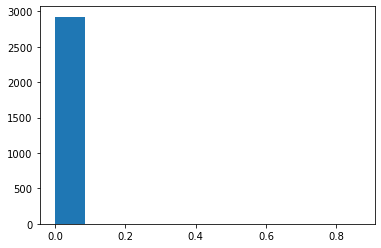

In [48]:
plt.hist(test_doc_topics[0])

In [60]:
# st_image_array_saved_data = "/Users/brendan/Desktop/PostDoc/work/Cell Count/data/BC_Layer1_Model2_nuclei_counts_and_masks.pickle"
hdp_test_model_save_path = "/Users/brendan/Desktop/PostDoc/work/STDeconvolve/data/hdp_test_random1000genes_40K_iter_tomotopy.model"

hdp.save(hdp_test_model_save_path, full=True)

hdp_test_corpus_save_path = "/Users/brendan/Desktop/PostDoc/work/STDeconvolve/data/hdp_test_random1000genes_40K_iter_tomotopy_corpus.pickle"

with open(hdp_test_corpus_save_path, 'wb') as f:
    pickle.dump([corpus], f)

In [20]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import HdpModel

# Filter outlier words (e.g. appear <10 docs or in over 50% of docs)
vocab = corpora.Dictionary(corpus)
vocab.filter_extremes(no_below=20, no_above=0.5)
vocab.compactify()

# Build corpus
corpus_gensim = [vocab.doc2bow(genes) for genes in corpus]

In [27]:
%%time

hdp_gensim = HdpModel(corpus_gensim, vocab, gamma=1, T=30, alpha=0.1, K=8, kappa=1, random_state=20)

CPU times: user 733 ms, sys: 7.42 ms, total: 740 ms
Wall time: 741 ms


In [26]:
hdp_gensim

In [29]:
gensim.plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]")

NameError: name 'gensim' is not defined

In [31]:
hdp_gensim.show_topics()

[(0,
  '0.056*RP11-290F20.3 + 0.051*QRSL1 + 0.043*BLK + 0.040*CD19 + 0.038*SYTL3 + 0.037*GNG7 + 0.035*CD40 + 0.031*CD72 + 0.029*TNFRSF18 + 0.027*GSAP + 0.025*S100B + 0.024*CD22 + 0.023*P2RX5 + 0.022*SIGLEC7 + 0.019*AKR1C3 + 0.019*CSF3R + 0.019*CEP78 + 0.019*RP11-291B21.2 + 0.019*FCRLA + 0.018*ZNF683'),
 (1,
  '0.098*GNG7 + 0.061*CSF3R + 0.050*LGALS2 + 0.049*MS4A7 + 0.041*AKR1C3 + 0.039*TIGIT + 0.037*S100A12 + 0.026*ITGAM + 0.025*MYOM2 + 0.025*SIGLEC7 + 0.025*SYTL3 + 0.024*SH2D1B + 0.024*HMOX1 + 0.024*PLD4 + 0.023*GNPTAB + 0.023*CD19 + 0.020*CD72 + 0.020*RP11-291B21.2 + 0.020*CCL3 + 0.020*GSAP'),
 (2,
  '0.080*CD22 + 0.071*CD19 + 0.045*C1QA + 0.039*TNFRSF18 + 0.039*RP11-222K16.2 + 0.038*PIK3IP1 + 0.037*RALGPS2 + 0.034*IGLL5 + 0.034*ADTRP + 0.032*ZNF683 + 0.029*KLRF1 + 0.027*MZB1 + 0.026*CD160 + 0.025*CX3CR1 + 0.024*TNFRSF4 + 0.024*PNOC + 0.023*RP11-290F20.3 + 0.022*HLA-DOB + 0.021*IFI30 + 0.020*INPP4B'),
 (3,
  '0.123*FCER1A + 0.041*CSF3R + 0.038*FCER2 + 0.037*BANK1 + 0.034*C1QA + 0.033